# Music Informatics: Project

- Vasileios Katsaitis  (1115202000073)
- Dimokritos Kolitsos  (1115201900085)
- Konstantinos Chousos (1115202000215) 

In [35]:
import os
import librosa
import numpy as np
import pandas as pd

sample_rate = 44100
duration = 120 # 2 minutes

def trim_starting_zeros(audio):
    # Find the first non-zero sample
    non_zero_index = np.nonzero(audio)[0]
    if len(non_zero_index) > 0:
        return audio[non_zero_index[0]:]
    return audio

def load_and_trim_audio(file_path):
    audio, sr = librosa.load(file_path, sr=sample_rate)
    
    audio = librosa.util.normalize(audio) # <-------!!!!
    
    # Trim any starting silence
    trimmed_audio = trim_starting_zeros(audio)
    
    # Take only the first 'duration' seconds after trimming
    trimmed_audio = trimmed_audio[:duration * sample_rate]
    
    return trimmed_audio

def load_audio_dataset(base_path):
    data = []
    for root, _, files in os.walk(base_path):
        for file in files:
            if file.endswith('.mp3'):
                file_path = os.path.join(root, file)
                # Load, trim silence, and get the first 'duration' seconds
                audio = load_and_trim_audio(file_path)
                genre = os.path.basename(os.path.dirname(file_path))
                song_name = os.path.splitext(file)[0]
                data.append({
                    'song_name': song_name,
                    'genre': genre,
                    'audio': audio,
                })
    return pd.DataFrame(data)

# Load the dataset
df = load_audio_dataset('./data')

In [36]:
import pickle

with open('./data/df.pkl', 'wb') as f:
   pickle.dump(df, f)

del df

In [37]:
with open('./data/df.pkl', 'rb') as f:
   df = pickle.load(f)

In [38]:
display(df)

,song_name,genre,audio
0,BadBadNotGood - Triangle,jazz,"[1.8534026e-07, 4.294331e-07, 4.797495e-07, 1...."
1,Bill Evans Trio - Autumn Leaves,jazz,"[-1.1352264e-17, 2.2846427e-17, 1.089171e-17, ..."
2,Charles Mingus- Better Git It in Your Soul,jazz,"[-5.4656553e-05, -9.119155e-05, -7.734158e-05,..."
3,Cortex - Sans toi,jazz,"[1.9952068e-07, -1.1385721e-06, -8.4504427e-07..."
4,"Dave Brubeck, The Dave Brubeck Quartet - Take ...",jazz,"[9.1003814e-26, 9.065531e-23, 1.3221138e-21, -..."
5,Gerry Mulligan - Prelude In E Minor,jazz,"[-1.08011803e-19, -3.5464236e-18, -4.6286238e-..."
6,John Coltrane - But Not for Me,jazz,"[-4.0487368e-05, -3.098403e-05, -4.692908e-06,..."
7,Miles Davis - So What,jazz,"[-1.2861599e-27, -1.3292766e-25, -1.7426277e-2..."
8,Ryo Fukui - Scenery,jazz,"[-7.0728303e-23, -3.941833e-21, -2.6847423e-20..."
9,Snarky Puppy - Shofukan (We Like It Here),jazz,"[1.0504064e-27, 8.2465645e-26, 1.1234918e-24, ..."


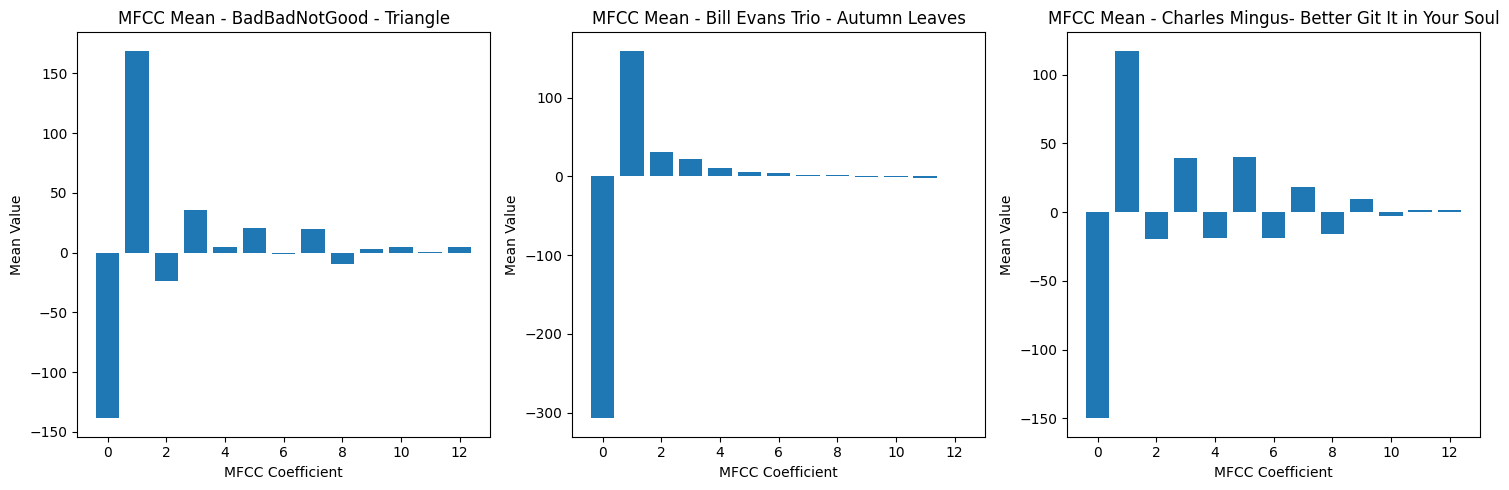

                                                mfcc_mean  \
count                                                  30   
unique                                                 30   
top     [-138.77544, 169.05087, -23.656183, 35.924736,...   
freq                                                    1   

                                              mfcc_median  \
count                                                  30   
unique                                                 30   
top     [-133.41855, 169.0257, -23.663555, 39.2446, 3....   
freq                                                    1   

                                                 mfcc_std  
count                                                  30  
unique                                                 30  
top     [70.70951, 32.376675, 24.528889, 24.444798, 17...  
freq                                                    1  


In [39]:
import matplotlib.pyplot as plt

def extract_mfccs(audio, sr, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfccs

def compute_mfcc_stats(mfccs):
    mean = np.mean(mfccs, axis=1)
    median = np.median(mfccs, axis=1)
    std = np.std(mfccs, axis=1)
    return mean, median, std

# Extract MFCCs and compute statistics for each song
mfcc_features = []

for _, row in df.iterrows():
    mfccs = extract_mfccs(row['audio'], sample_rate)
    mean, median, std = compute_mfcc_stats(mfccs)
    mfcc_features.append({
        'song_name': row['song_name'],
        'genre': row['genre'],
        'mfcc_mean': mean,
        'mfcc_median': median,
        'mfcc_std': std
    })

mfcc_df = pd.DataFrame(mfcc_features)

# Visualize MFCC statistics for a few songs
plt.figure(figsize=(15, 5))
for i in range(3):  # Plot for the first 3 songs
    plt.subplot(1, 3, i+1)
    plt.bar(range(13), mfcc_df.iloc[i]['mfcc_mean'])
    plt.title(f"MFCC Mean - {mfcc_df.iloc[i]['song_name']}")
    plt.xlabel('MFCC Coefficient')
    plt.ylabel('Mean Value')
plt.tight_layout()
plt.show()

# Print summary statistics
print(mfcc_df[['mfcc_mean', 'mfcc_median', 'mfcc_std']].describe())

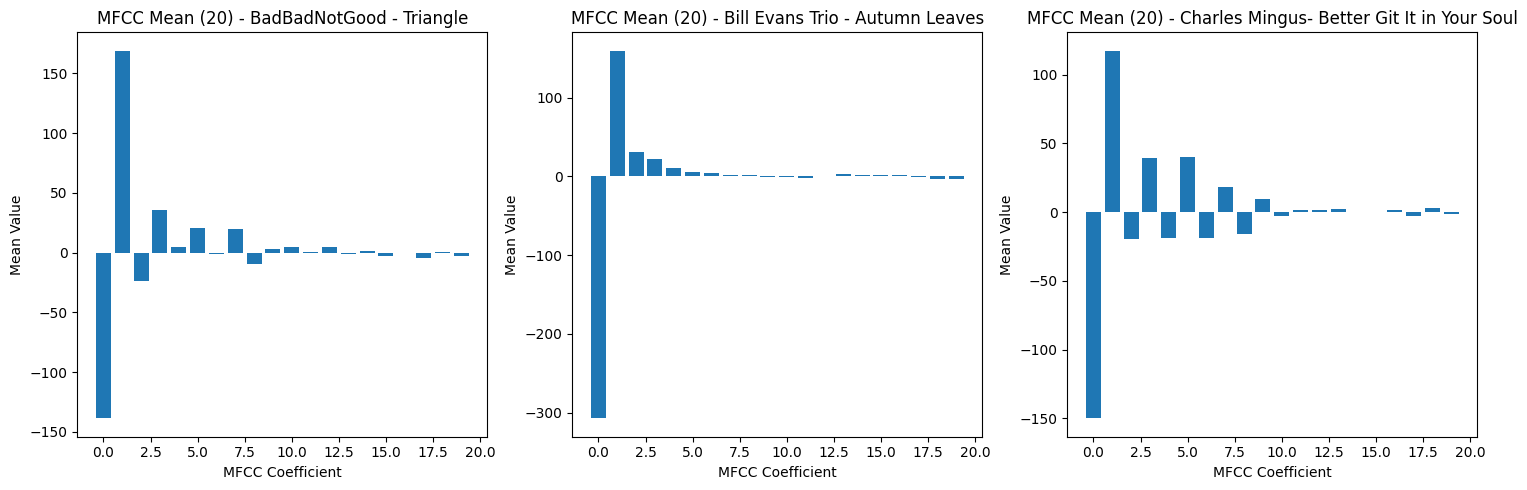

                                                mfcc_mean  \
count                                                  30   
unique                                                 30   
top     [-138.77544, 169.05087, -23.656183, 35.924736,...   
freq                                                    1   

                                              mfcc_median  \
count                                                  30   
unique                                                 30   
top     [-133.41855, 169.0257, -23.663555, 39.2446, 3....   
freq                                                    1   

                                                 mfcc_std  
count                                                  30  
unique                                                 30  
top     [70.70951, 32.376675, 24.528889, 24.444798, 17...  
freq                                                    1  


In [40]:
def extract_mfccs(audio, sr, n_mfcc=20):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfccs

# Repeat the previous process with n_mfcc=20
mfcc_features_20 = []

for _, row in df.iterrows():
    mfccs = extract_mfccs(row['audio'], sample_rate, n_mfcc=20)
    mean, median, std = compute_mfcc_stats(mfccs)
    mfcc_features_20.append({
        'song_name': row['song_name'],
        'genre': row['genre'],
        'mfcc_mean': mean,
        'mfcc_median': median,
        'mfcc_std': std
    })

mfcc_df_20 = pd.DataFrame(mfcc_features_20)

# Visualize MFCC statistics for a few songs
plt.figure(figsize=(15, 5))
for i in range(3):  # Plot for the first 3 songs
    plt.subplot(1, 3, i+1)
    plt.bar(range(20), mfcc_df_20.iloc[i]['mfcc_mean'])
    plt.title(f"MFCC Mean (20) - {mfcc_df_20.iloc[i]['song_name']}")
    plt.xlabel('MFCC Coefficient')
    plt.ylabel('Mean Value')
plt.tight_layout()
plt.show()

# Print summary statistics
print(mfcc_df_20[['mfcc_mean', 'mfcc_median', 'mfcc_std']].describe())

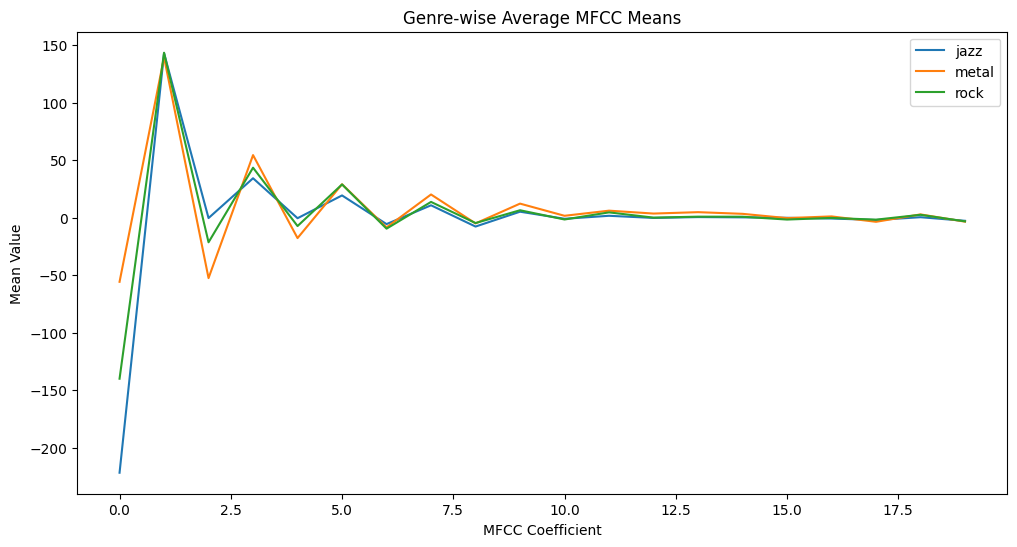

MFCC genre differentiation score: 6.638685703277588


In [41]:
# Now check the genre-wise differentiation score for MFCCs
mfcc_means = np.array(mfcc_df_20['mfcc_mean'].tolist())
genre_mfcc_means = pd.DataFrame(mfcc_means, index=mfcc_df_20['genre']).groupby(level=0).mean()

# Visualize genre-wise MFCC means
plt.figure(figsize=(12, 6))
for genre in genre_mfcc_means.index:
    plt.plot(genre_mfcc_means.loc[genre], label=genre)
plt.title('Genre-wise Average MFCC Means')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

# Calculate and print genre differentiation score for MFCCs
mfcc_diff_score = np.mean(np.std(genre_mfcc_means.values, axis=0))
print(f"MFCC genre differentiation score: {mfcc_diff_score}")

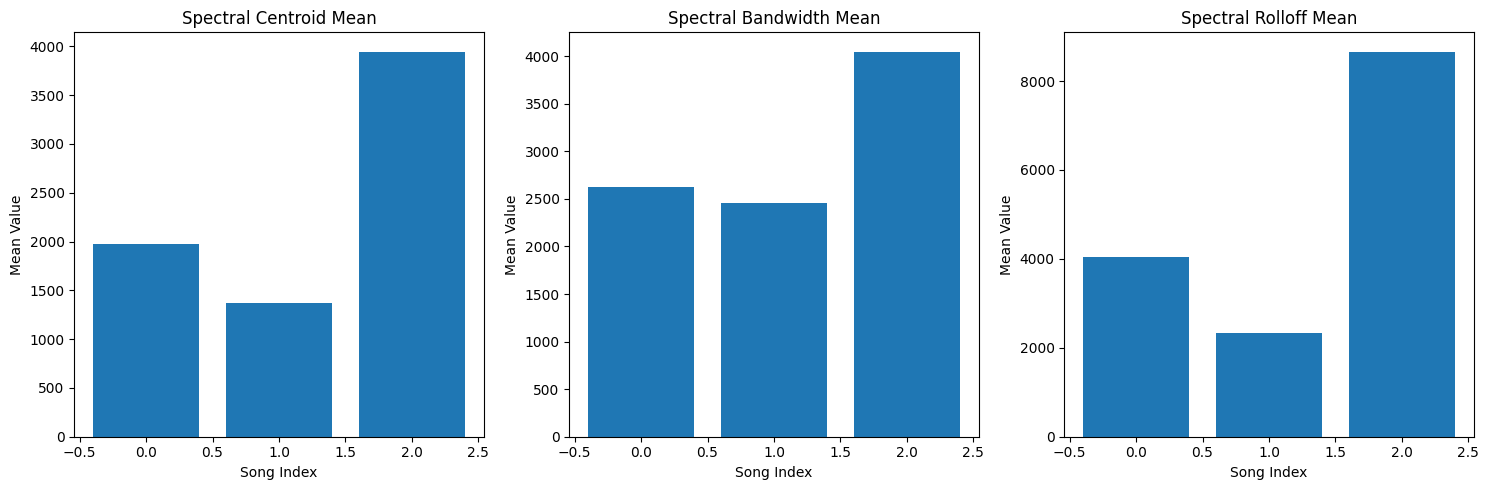

       spectral_centroid_mean  spectral_centroid_median  \
count               30.000000                 30.000000   
mean              2728.903290               2618.198917   
std                735.345136                780.095455   
min               1330.572741               1143.928599   
25%               2081.065020               1989.463181   
50%               2983.175496               2757.555278   
75%               3195.136186               3178.941598   
max               3946.959354               3898.877910   

       spectral_centroid_std  spectral_bandwidth_mean  \
count              30.000000                30.000000   
mean              900.382013              3206.617189   
std               278.209209               498.726008   
min               515.221537              2199.771071   
25%               709.698173              2994.118554   
50%               831.828953              3206.310858   
75%              1002.308471              3494.099187   
max         

In [42]:
def extract_spectral_features(audio, sr):
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]
    
    return {
        'spectral_centroid': spectral_centroid,
        'spectral_bandwidth': spectral_bandwidth,
        'spectral_rolloff': spectral_rolloff
    }

def compute_feature_stats(feature):
    return {
        'mean': np.mean(feature),
        'median': np.median(feature),
        'std': np.std(feature)
    }

# Extract spectral features and compute statistics for each song
spectral_features = []

for _, row in df.iterrows():
    features = extract_spectral_features(row['audio'], sample_rate)
    stats = {
        'song_name': row['song_name'],
        'genre': row['genre']
    }
    for feature_name, feature_data in features.items():
        feature_stats = compute_feature_stats(feature_data)
        for stat_name, stat_value in feature_stats.items():
            stats[f'{feature_name}_{stat_name}'] = stat_value
    
    spectral_features.append(stats)

spectral_df = pd.DataFrame(spectral_features)

# Visualize spectral features for a few songs
plt.figure(figsize=(15, 5))
features_to_plot = ['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff']
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i+1)
    plt.bar(range(3), spectral_df.iloc[:3][f'{feature}_mean'])
    plt.title(f"{feature.replace('_', ' ').title()} Mean")
    plt.xlabel('Song Index')
    plt.ylabel('Mean Value')
plt.tight_layout()
plt.show()

# Print summary statistics
print(spectral_df[[f'{feature}_{stat}' for feature in features_to_plot for stat in ['mean', 'median', 'std']]].describe())

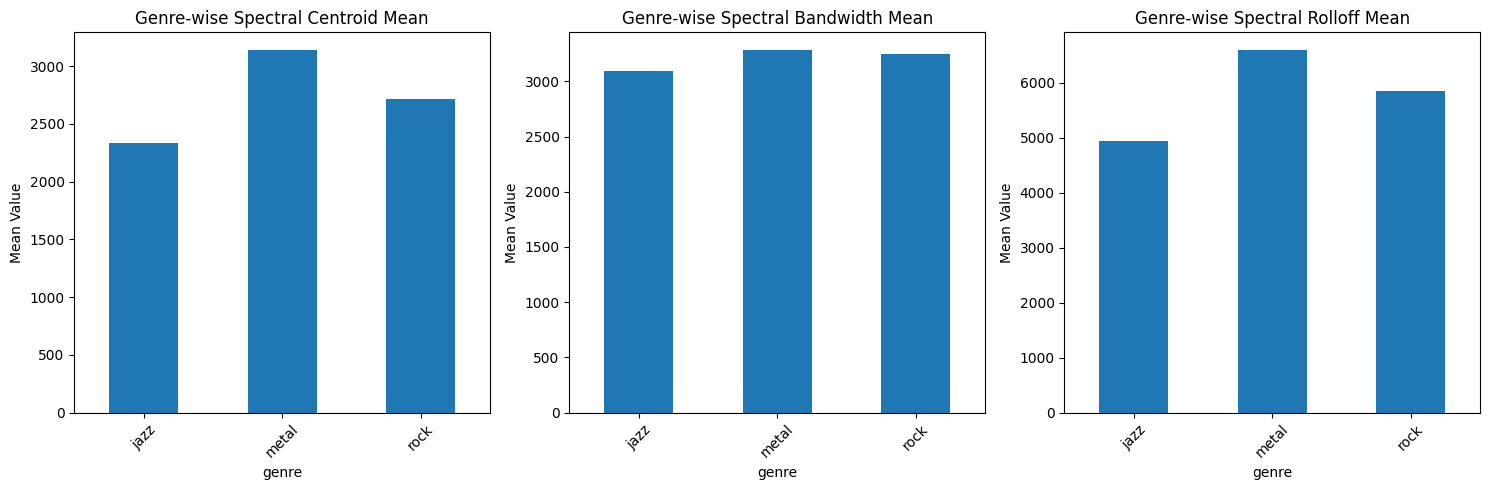

Spectral features genre differentiation score: 359.59128856817546


In [43]:
# Now check the genre-wise differentiation score for spectral features
numeric_columns = ['spectral_centroid_mean', 'spectral_bandwidth_mean', 'spectral_rolloff_mean']
genre_spectral_means = spectral_df.groupby('genre')[numeric_columns].mean()

# Visualize genre-wise spectral features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_columns):
    plt.subplot(1, 3, i+1)
    genre_spectral_means[feature].plot(kind='bar')
    plt.title(f'Genre-wise {feature.replace("_", " ").title()}')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate and print genre differentiation score for spectral features
spectral_diff_score = np.mean(np.std(genre_spectral_means.values, axis=0))
print(f"Spectral features genre differentiation score: {spectral_diff_score}")

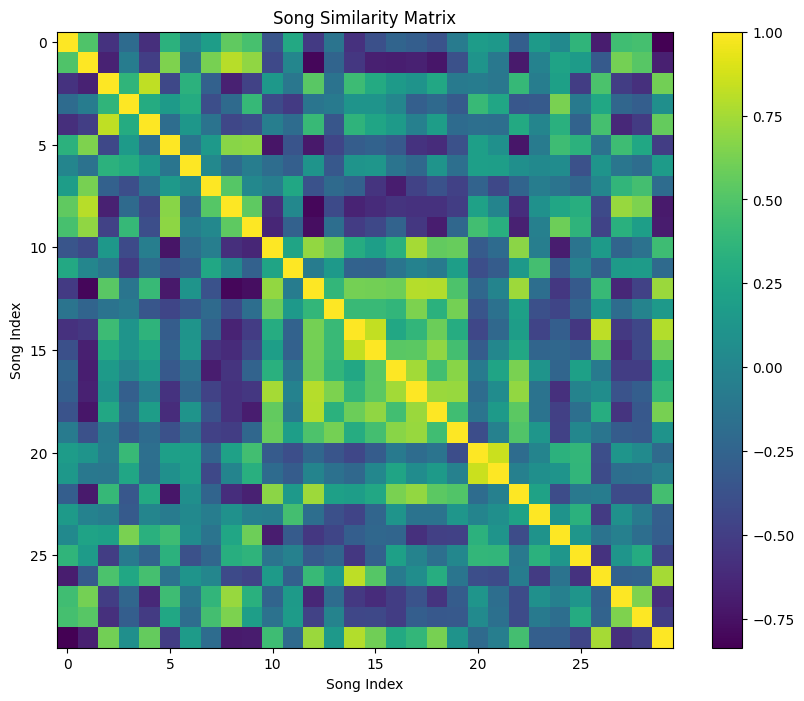

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Combine MFCC and spectral features
mfcc_features = np.array(mfcc_df_20['mfcc_mean'].tolist())
spectral_features = spectral_df[['spectral_centroid_mean', 'spectral_bandwidth_mean', 'spectral_rolloff_mean']].values

# Concatenate features
X = np.hstack((mfcc_features, spectral_features))

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute similarity matrix
similarity_matrix = cosine_similarity(X_scaled)

def recommend_songs(song_index, n_recommendations=5):
    song_similarities = similarity_matrix[song_index]
    similar_indices = song_similarities.argsort()[::-1][1:n_recommendations+1]  # Exclude the song itself
    recommendations = pd.DataFrame({
        'song_name': mfcc_df_20.iloc[similar_indices]['song_name'].values,
        'genre': mfcc_df_20.iloc[similar_indices]['genre'].values,
        'similarity': song_similarities[similar_indices]
    })
    return recommendations.sort_values('similarity', ascending=False)

# Visualize similarity matrix
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis')
plt.colorbar()
plt.title('Song Similarity Matrix')
plt.xlabel('Song Index')
plt.ylabel('Song Index')
plt.show()

In [45]:
# Example: Get recommendations for a jazz, a metal and a rock song
print("\nRecommendations for:", mfcc_df_20.iloc[0]['song_name'])
print(recommend_songs(0))

print("\nRecommendations for:", mfcc_df_20.iloc[10]['song_name'])
print(recommend_songs(10))

print("\nRecommendations for:", mfcc_df_20.iloc[20]['song_name'])
print(recommend_songs(20))


Recommendations for: BadBadNotGood - Triangle
                                   song_name genre  similarity
0                        Ryo Fukui - Scenery  jazz    0.552628
1            Bill Evans Trio - Autumn Leaves  jazz    0.492176
2  Snarky Puppy - Shofukan (We Like It Here)  jazz    0.465762
3                   Radiohead - No Surprises  rock    0.461290
4          Pink Floyd - Breathe (In The Air)  rock    0.438033

Recommendations for: Fit For An Autopsy - Black Mammoth
                          song_name  genre  similarity
0  Parkway Drive - Dying To Believe  metal    0.750073
1            Gojira - All The Tears  metal    0.701624
2     Alter Bridge - Open Your Eyes   rock    0.677676
3       Lamb of God - Again We Rise  metal    0.578554
4            Trivium - Chaos Reigns  metal    0.573539

Recommendations for: 12 Stones - Stay
                                   song_name genre  similarity
0                  12 Stones - The Last Song  rock    0.849763
1  Snarky Puppy - Shofu